<a href="https://colab.research.google.com/github/Faligithub/IIIT-ihub/blob/main/AIML_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is

*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

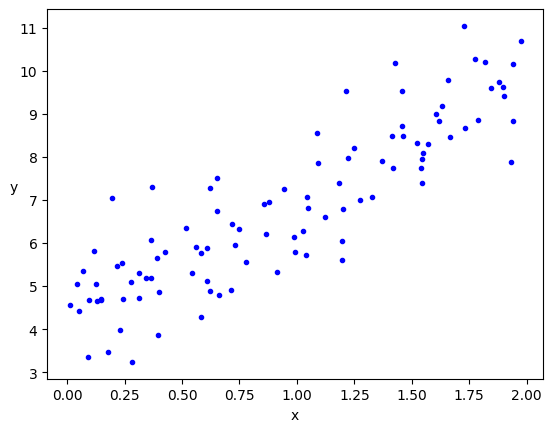

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.593
y_pred[1]: 3.357
Final error: 5773.025


Plotting the error vs Number of iterations

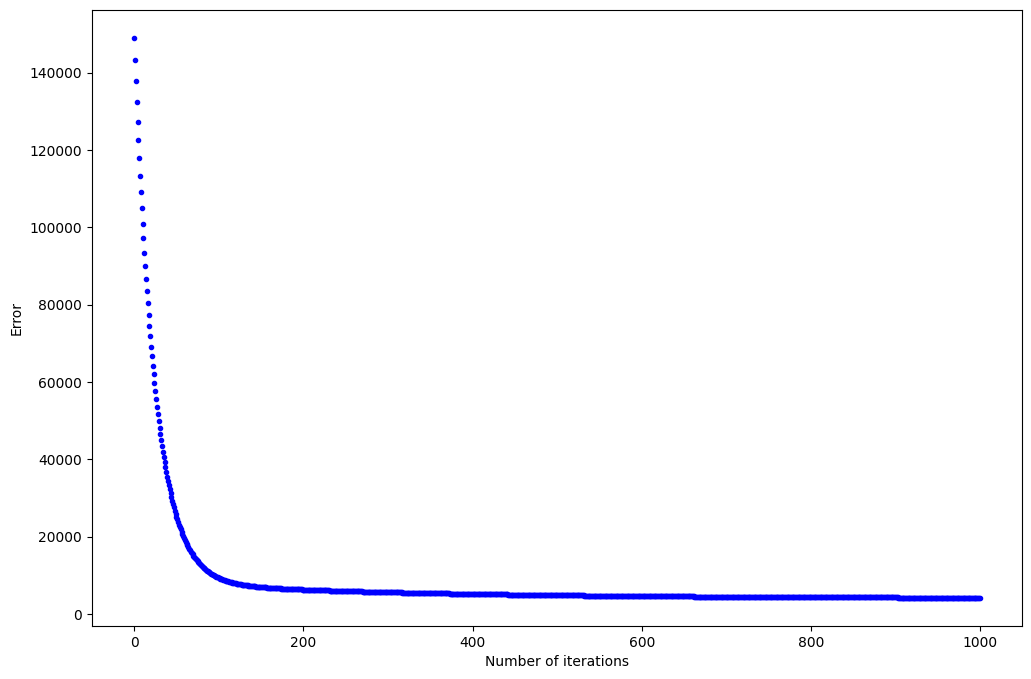

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

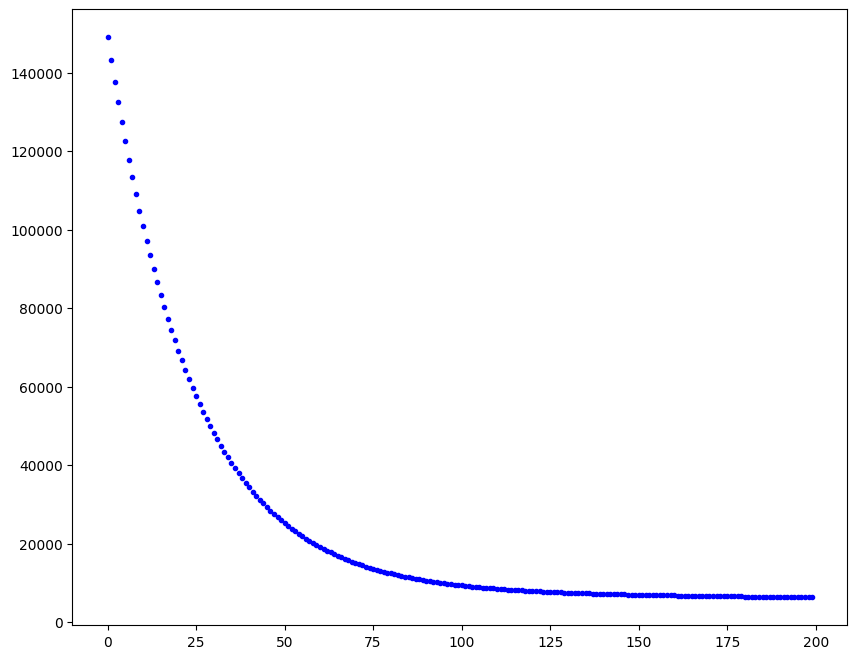

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


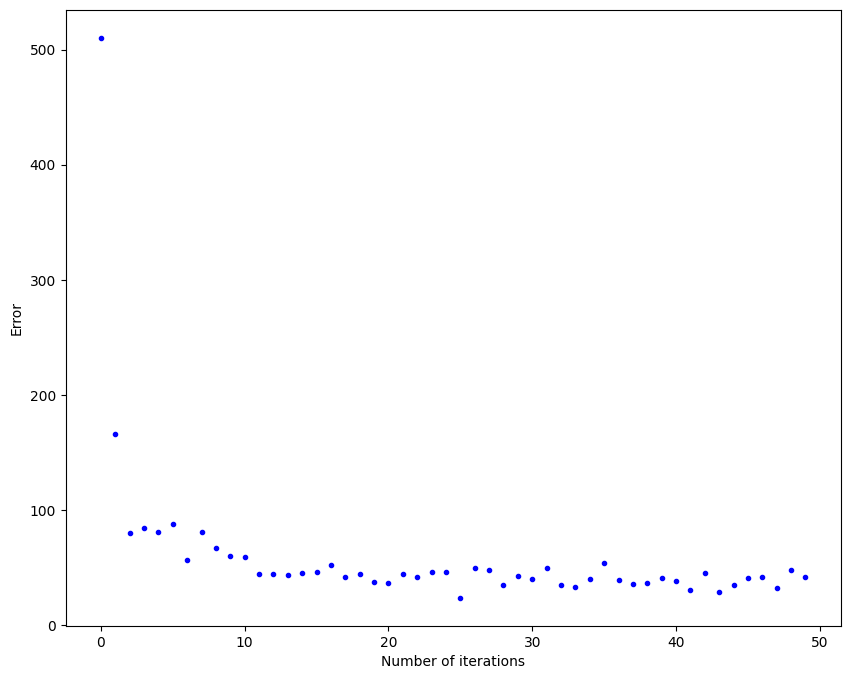

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


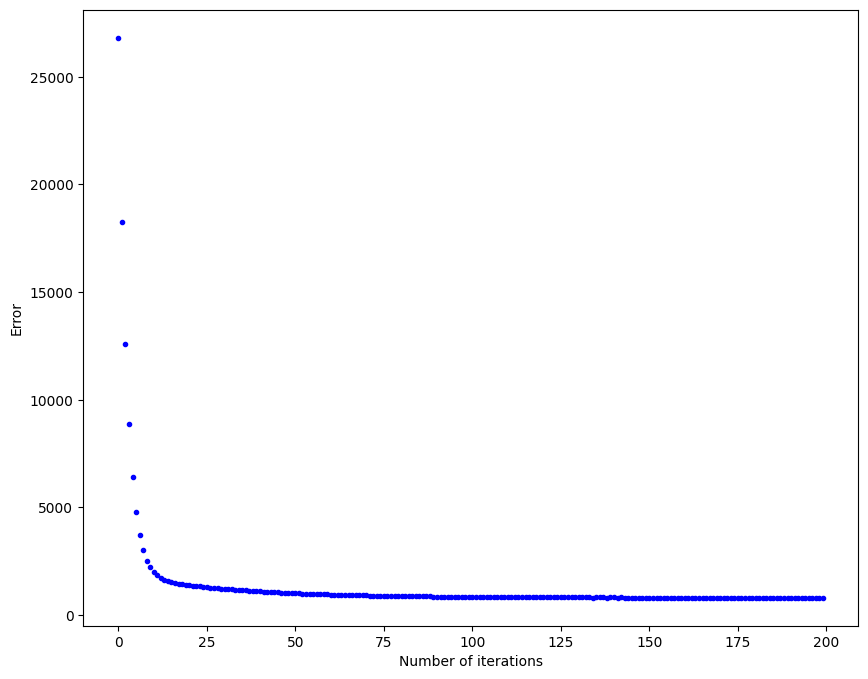

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

y_pred[0]: 3.984
y_pred[1]: 3.040
Final error: 2767.166


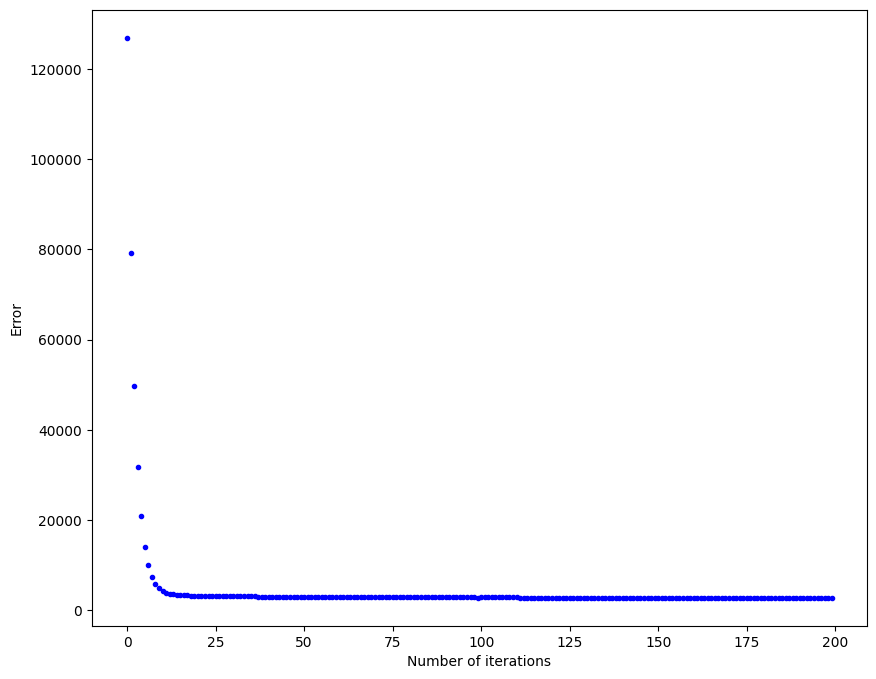

In [ ]:
# Change batch size in mini-batch gradient descent.
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations
    batch_size = size of the mini-batch
    Returns the final y_pred vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)
        cost_history[it]  = cost
    return y_pred, cost_history

# Example with a different batch size
lr = 0.1
n_iter = 200
batch_size = 50  # Change the batch size here
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size)
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

# Plot the results
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history, 'b.')
plt.show()


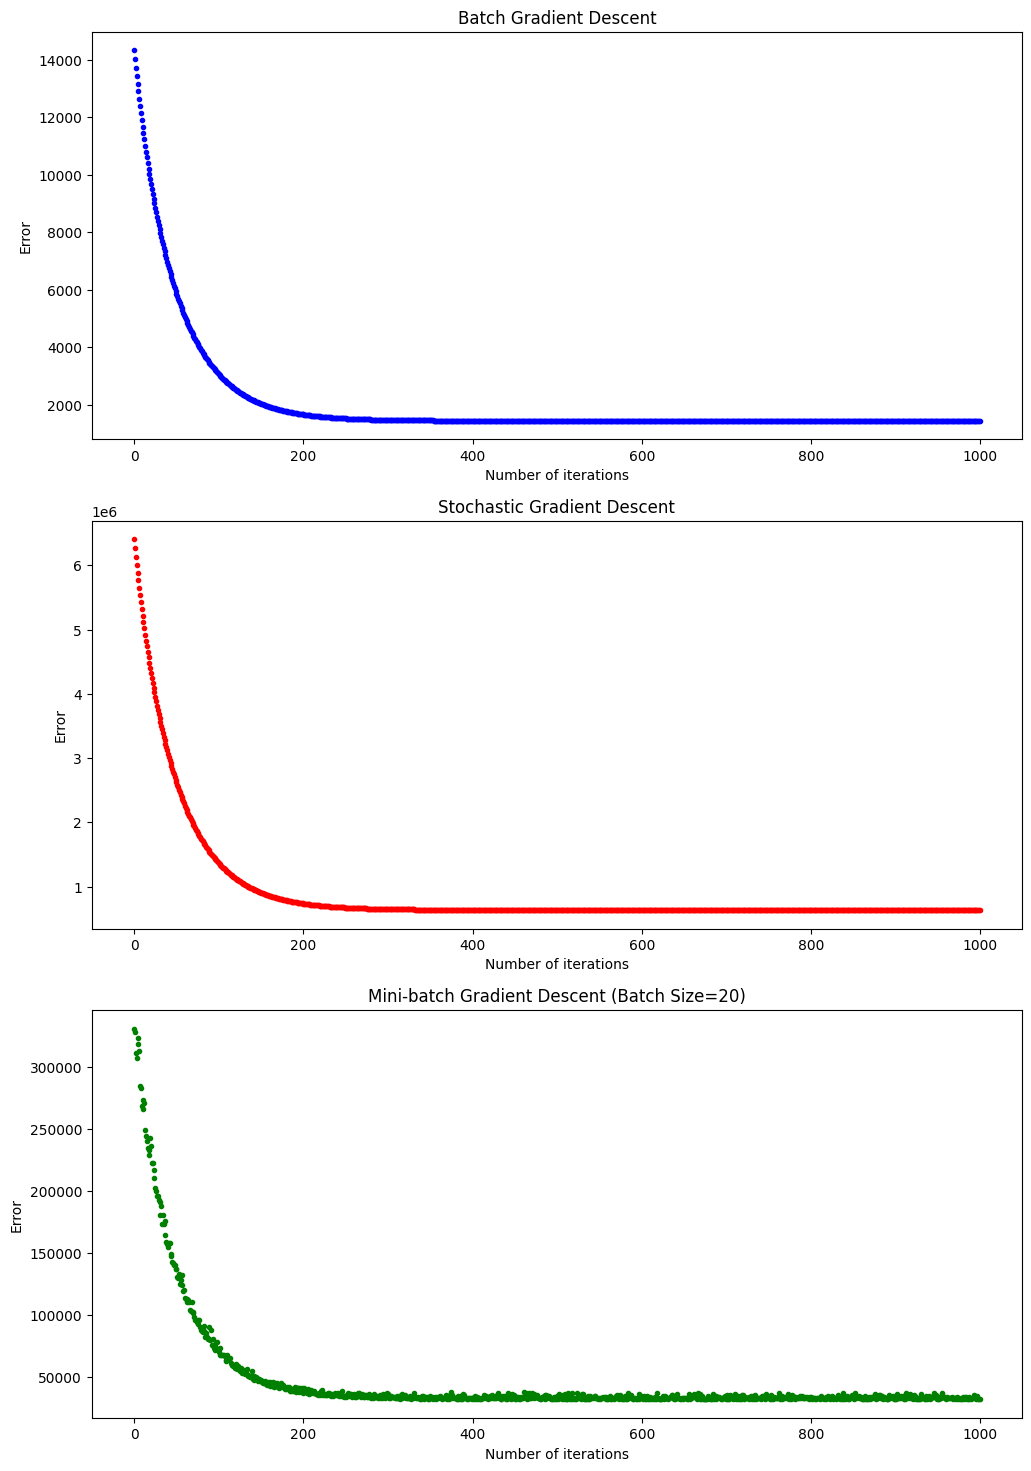

In [ ]:
# Test all the three out on real datasets.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
data = load_diabetes()
X_real, y_real = data.data, data.target.reshape(-1, 1)

# Standardize features (important for gradient descent)
scaler = StandardScaler()
X_real = scaler.fit_transform(X_real)

# Function to calculate the cost for linear regression
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Function for Batch Gradient Descent
def batch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = cal_cost(y_pred, X, y)
    return y_pred, cost_history

# Function for Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            X_i = X[i, :].reshape(1, X.shape[1])
            y_i = y[i].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)
        cost_history[it] = cost
    return y_pred, cost_history

# Function for Mini-batch Gradient Descent
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)
        cost_history[it] = cost
    return y_pred, cost_history

# Set parameters
lr = 0.01
n_iter = 1000
batch_size = 20

# Initialize random weights
y_pred = np.random.randn(X_real.shape[1] + 1, 1)

# Apply Batch Gradient Descent
X_batch = np.c_[np.ones((len(X_real), 1)), X_real]
y_pred_batch, cost_history_batch = batch_gradient_descent(X_batch, y_real, y_pred, lr, n_iter)

# Apply Stochastic Gradient Descent
y_pred_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_batch, y_real, y_pred, lr, n_iter)

# Apply Mini-batch Gradient Descent
y_pred_minibatch, cost_history_minibatch = minibatch_gradient_descent(X_real, y_real, y_pred, lr, n_iter, batch_size)

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Batch GD
axs[0].plot(range(n_iter), cost_history_batch, 'b.')
axs[0].set_title('Batch Gradient Descent')
axs[0].set_xlabel('Number of iterations')
axs[0].set_ylabel('Error')

# Stochastic GD
axs[1].plot(range(n_iter), cost_history_stochastic, 'r.')
axs[1].set_title('Stochastic Gradient Descent')
axs[1].set_xlabel('Number of iterations')
axs[1].set_ylabel('Error')

# Mini-batch GD
axs[2].plot(range(n_iter), cost_history_minibatch, 'g.')
axs[2].set_title('Mini-batch Gradient Descent (Batch Size={})'.format(batch_size))
axs[2].set_xlabel('Number of iterations')
axs[2].set_ylabel('Error')

plt.show()


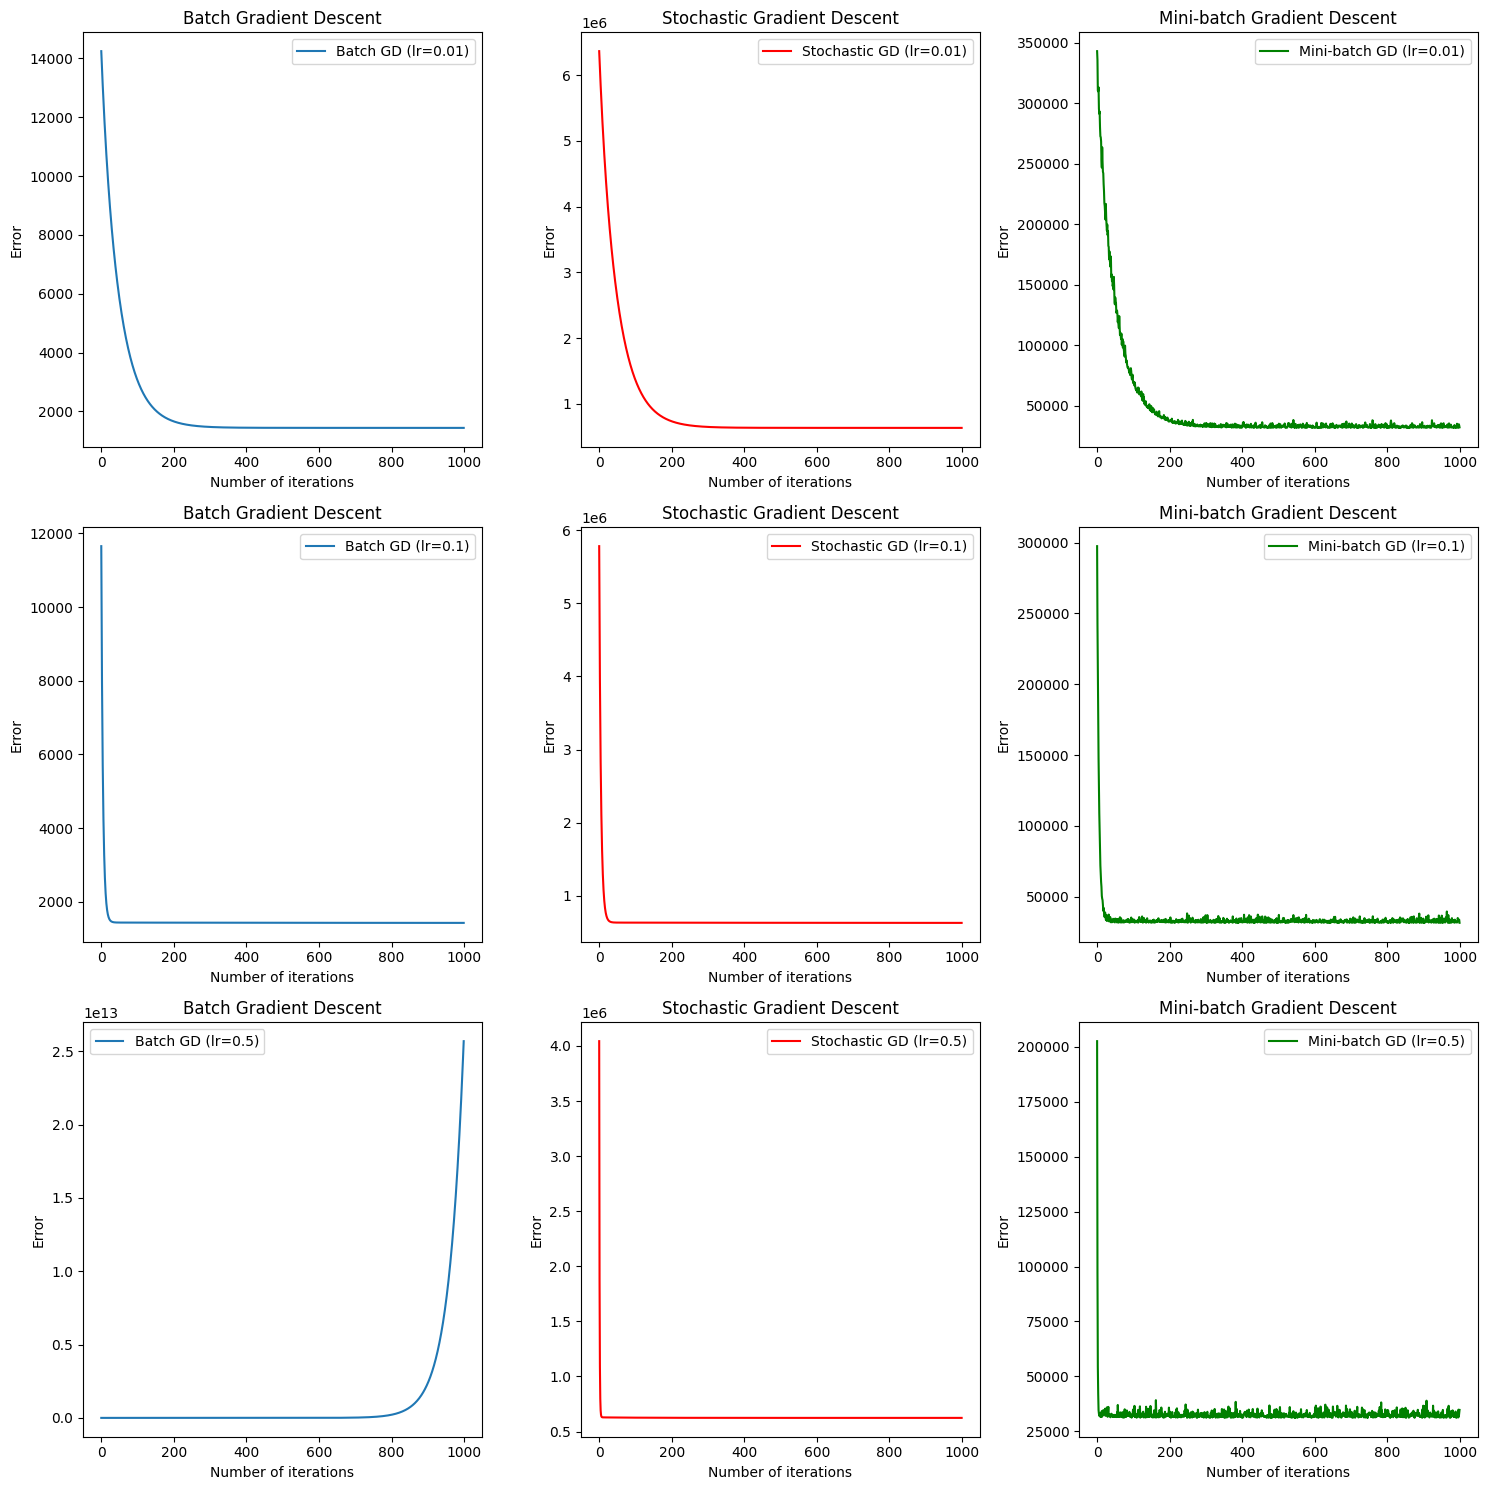

In [ ]:
# Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
data = load_diabetes()
X_real, y_real = data.data, data.target.reshape(-1, 1)

# Standardize features (important for gradient descent)
scaler = StandardScaler()
X_real = scaler.fit_transform(X_real)

# Function to calculate the cost for linear regression
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Function for Batch Gradient Descent
def batch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = cal_cost(y_pred, X, y)
    return y_pred, cost_history

# Function for Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            X_i = X[i, :].reshape(1, X.shape[1])
            y_i = y[i].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)
        cost_history[it] = cost
    return y_pred, cost_history

# Function for Mini-batch Gradient Descent
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)
        cost_history[it] = cost
    return y_pred, cost_history

# Set parameters
n_iter = 1000
batch_size = 20

# Initialize random weights
y_pred = np.random.randn(X_real.shape[1] + 1, 1)

# Learning rates to compare
learning_rates = [0.01, 0.1, 0.5]

# Plot the results
fig, axs = plt.subplots(len(learning_rates), 3, figsize=(15, 5 * len(learning_rates)))

for i, lr in enumerate(learning_rates):
    # Apply Batch Gradient Descent
    X_batch = np.c_[np.ones((len(X_real), 1)), X_real]
    y_pred_batch, cost_history_batch = batch_gradient_descent(X_batch, y_real, y_pred.copy(), lr, n_iter)

    # Apply Stochastic Gradient Descent
    y_pred_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_batch, y_real, y_pred.copy(), lr, n_iter)

    # Apply Mini-batch Gradient Descent
    y_pred_minibatch, cost_history_minibatch = minibatch_gradient_descent(X_real, y_real, y_pred.copy(), lr, n_iter, batch_size)

    # Plot the results
    axs[i, 0].plot(range(n_iter), cost_history_batch, label=f'Batch GD (lr={lr})')
    axs[i, 0].set_title('Batch Gradient Descent')
    axs[i, 0].set_xlabel('Number of iterations')
    axs[i, 0].set_ylabel('Error')
    axs[i, 0].legend()

    axs[i, 1].plot(range(n_iter), cost_history_stochastic, label=f'Stochastic GD (lr={lr})', color='r')
    axs[i, 1].set_title('Stochastic Gradient Descent')
    axs[i, 1].set_xlabel('Number of iterations')
    axs[i, 1].set_ylabel('Error')
    axs[i, 1].legend()

    axs[i, 2].plot(range(n_iter), cost_history_minibatch, label=f'Mini-batch GD (lr={lr})', color='g')
    axs[i, 2].set_title('Mini-batch Gradient Descent')
    axs[i, 2].set_xlabel('Number of iterations')
    axs[i, 2].set_ylabel('Error')
    axs[i, 2].legend()

plt.tight_layout()
plt.show()
# In BGD
#low learning rate(0.01)-->steady but slow convergence
#high learning rate(0.5)-->rapid initial progress but introduces oscillations and instability

# In SGD
#low learning rate(0.01)-->slow but erratic convergence
#moderate rate (0.1)-->leads to faster yet erratic progress
#high rate (0.5)-->induces rapid but highly erratic convergence

# In MBGD
#low & moderate learning rates(0.01,0.1)-->exhibit smoother and relatively rapid convergence
#high learning rate(0.5)--->maintains a relatively smooth curve.

